In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def runge_kutta_sedo1(funcX, FuncY, a, b, y0, y1, N):
    '''Metodo Runge Kutta(ord. 4) para sistemas de ecuaciones diferenciales de orden 1'''

    h = (b - a) / N

    t = [a]
    u = [y0]
    v = [y1]

    for k in range(N):
        k11 = funcX(t[k], u[k], v[k])
        k12 = FuncY(t[k], u[k], v[k])

        k21 = funcX(t[k] + h/2, u[k] + h*k11/2, v[k] + h*k12/2)
        k22 = FuncY(t[k] + h/2, u[k] + h*k11/2, v[k] + h*k12/2)

        k31 = funcX(t[k] + h/2, u[k] + h*k21/2, v[k] + h*k22/2)
        k32 = FuncY(t[k] + h/2, u[k] + h*k21/2, v[k] + h*k22/2)

        k41 = funcX(t[k] + h, u[k] + h*k31, v[k] + h*k32)
        k42 = FuncY(t[k] + h, u[k] + h*k31, v[k] + h*k32)

        # añadimos los valores a la lista
        t.append(t[k] + h)
        u.append(u[k] + h*(k11 + 2*k21 + 2*k31 + k41)/6)
        v.append(v[k] + h*(k12 + 2*k22 + 2*k32 + k42)/6)

    return t, u, v


## Ejemplo 1: Ec. Volterra
$x(t)$: número de conejos en el monte en el instante de tiempo $t$.  
$y(t)$: número de zorros en el monte en el instante de tiempo $t$.  

PVI:  
$$
\begin{cases}
    x'(t) = px - qxy \\
    y'(t) = -ry + sxy \\
    x(0) = x_0 \\
    y(0) = y_0
\end{cases}
$$

Parámetros:  
- $p$: tasa de crecimiento de los conejos.
- $q$: tasa de mortalidad de los conejos por los zorros.
- $r$: tasa de mortalidad de los zorros.
- $s$: tasa de crecimiento de los zorros por los conejos.




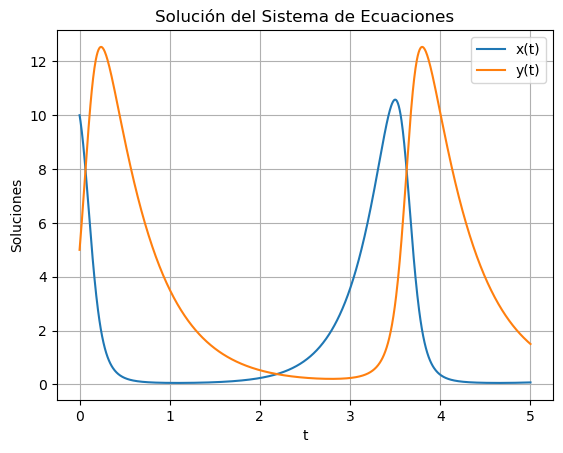

In [21]:
import matplotlib.pyplot as plt

def f1(t, x, y, p, q):
    return p*x - q*x*y

def f2(t, x, y, r, s):
    return -r*y + s*x*y

def runge_kutta_sistema_volterra(f1, f2, t0, x0, y0, p, q, r, s, N, a, b):
    '''Funcion que resuelve un sistema de ecuaciones de primer orden usando el método de Runge-Kutta de orden 4.

    INPUTS:
    - f1, f2: funciones que definen el sistema de ecuaciones dx/dt = f1(t, x, y) y dy/dt = f2(t, x, y)
    - t0: tiempo inicial
    - x0, y0: condiciones iniciales para x(t) y y(t)
    - p, q, r, s: parámetros del sistema
    - N: número de puntos
    - h: paso de tiempo
    '''

    h = (b - a) / N

    t_values = [t0]
    x_values = [x0]
    y_values = [y0]

    for _ in range(N):
        # cogemos los valores del paso anterior
        t = t_values[-1]
        x = x_values[-1]
        y = y_values[-1]

        # calculamos los valores de k1, k2, k3 y k4
        k1_x = h * f1(t, x, y, p, q)
        k1_y = h * f2(t, x, y, r, s)

        k2_x = h * f1(t + 0.5 * h, x + 0.5 * k1_x, y + 0.5 * k1_y, p, q)
        k2_y = h * f2(t + 0.5 * h, x + 0.5 * k1_x, y + 0.5 * k1_y, r, s)

        k3_x = h * f1(t + 0.5 * h, x + 0.5 * k2_x, y + 0.5 * k2_y, p, q)
        k3_y = h * f2(t + 0.5 * h, x + 0.5 * k2_x, y + 0.5 * k2_y, r, s)

        k4_x = h * f1(t + h, x + k3_x, y + k3_y, p, q)
        k4_y = h * f2(t + h, x + k3_x, y + k3_y, r, s)

        # y añadimos los valores a la lista
        t_values.append(t + h)
        x_values.append(x + (k1_x + 2 * k2_x + 2 * k3_x + k4_x) / 6)
        y_values.append(y + (k1_y + 2 * k2_y + 2 * k3_y + k4_y) / 6)

    return t_values, x_values, y_values

# Parámetros del sistema
p = 3
q = 1
r = 2
s = 1

# Condiciones iniciales
t0 = 0
x0 = 10
y0 = 5

# Número de puntos y paso de tiempo
N = 1000
a = t0
b = 5

# Resolver el sistema con Runge-Kutta de orden 4
t_values, x_values, y_values = runge_kutta_sistema_volterra(f1, f2, t0, x0, y0, p, q, r, s, N, a, b)

# Visualización de los resultados
plt.plot(t_values, x_values, label='x(t)')
plt.plot(t_values, y_values, label='y(t)')
plt.xlabel('t')
plt.ylabel('Soluciones')
plt.title('Solución del Sistema de Ecuaciones')
plt.legend()
plt.grid(True)
plt.show()
